In [1]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd
from stockstats import StockDataFrame

In [2]:
pd.options.mode.chained_assignment = None
%matplotlib inline

In [3]:
data = pd.read_csv('ohlc-2012-12-31_2018-04-04.csv',sep=',', quoting=csv.QUOTE_ALL)

In [4]:
data.head()

,Date,Open,High,Low,Close
0,2012-12-31 00:00:00,13.45,13.56,13.37,13.51
1,2013-01-01 00:00:00,13.51,13.56,13.16,13.30
2,2013-01-02 00:00:00,13.30,13.40,13.16,13.28
3,2013-01-03 00:00:00,13.28,13.46,13.25,13.40
4,2013-01-04 00:00:00,13.40,13.52,13.27,13.50


### Filter Dataset

In [5]:
data = data.dropna()
data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d")

In [6]:
data_to_predict = data
data = data[(data['Date'] < '2018-04-05')]
data = data.sort_values(by='Date') 
data.tail()

,Date,Open,High,Low,Close
1916,2018-03-31,6844.32,7213.50,6796.82,6926.02
1917,2018-04-01,6926.02,7034.93,6443.20,6816.74
1918,2018-04-02,6816.74,7108.20,6775.71,7049.79
1919,2018-04-03,7049.79,7506.68,7022.99,7417.89
1920,2018-04-04,7417.89,7419.80,6715.56,6789.30


### Way without stockDataFrame

In [7]:
#dataset['H-L'] = dataset['High'] - dataset['Low']
#dataset['O-C'] = dataset['Close'] - dataset['Open']
#dataset['3day MA'] = dataset['Close'].shift(1).rolling(window = 3).mean()
#dataset['7day MA'] = dataset['Close'].shift(1).rolling(window = 7).mean()
#dataset['30day MA'] = dataset['Close'].shift(1).rolling(window = 30).mean()
#dataset['Std_dev']= dataset['Close'].rolling(5).std()
#dataset['RSI'] = talib.RSI(dataset['Close'].values, timeperiod = 9)
#dataset['Williams %R'] = talib.WILLR(dataset['High'].values, dataset['Low'].values, dataset['Close'].values, 7)

In [8]:
dataset = data.copy()

In [9]:
stock = StockDataFrame.retype(data)
stock.get('open_3_sma')
stock.get('open_7_sma')
stock.get('open_30_sma')
stock['wr_7']
stock['rsi_14']
stock.head()

,open,high,low,close,open_3_sma,open_7_sma,open_30_sma,wr_7,close_-1_s,close_-1_d,rs_14,rsi_14
date,,,,,,,,,,,,
2012-12-31,13.45,13.56,13.37,13.51,13.450000,13.450,13.450,26.315789,NaN,NaN,NaN,NaN
2013-01-01,13.51,13.56,13.16,13.30,13.480000,13.480,13.480,65.000000,13.51,-0.21,0.000000,0.000000
2013-01-02,13.30,13.40,13.16,13.28,13.420000,13.420,13.420,70.000000,13.30,-0.02,0.000000,0.000000
2013-01-03,13.28,13.46,13.25,13.40,13.363333,13.385,13.385,40.000000,13.28,0.12,0.601073,37.541899
2013-01-04,13.40,13.52,13.27,13.50,13.326667,13.388,13.388,15.000000,13.40,0.10,1.140498,53.281903


dataset['H-L'] = dataset['High'] - dataset['Low']
dataset['O-C'] = dataset['Open'] - dataset['Close']
dataset['close_3_sma'] = stock.get('close_3_sma')
dataset['close_7_sma'] = stock.get('close_7_sma')
dataset['close_30_sma'] = stock.get('close_30_sma')
dataset['std_dev']= dataset['Close'].rolling(5).std()
dataset.tail()
#
#dataset['Std_dev']= dataset['Close'].rolling(5).std()
#dataset['RSI'] = talib.RSI(dataset['Close'].values, timeperiod = 9)
#dataset['Williams %R'] = talib.WILLR(dataset['High'].values, dataset['Low'].values, dataset['Close'].values, 7)

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso 

In [11]:
y = stock['close']


In [12]:
X = stock[['open', 'open_3_sma', 'open_7_sma', 'open_30_sma', 'wr_7', 'rsi_14']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X[1:],y[1:],test_size=0.4,random_state=4)

In [14]:
print(len(X))
print(len(X_train))
print(len(X_test))

1921
1152
768


In [15]:
model = Lasso()

In [16]:
model.fit(X_train,y_train)

/home/henry/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
predicted = model.predict(X_test)

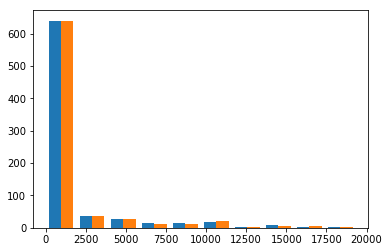

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([predicted, y_test]);

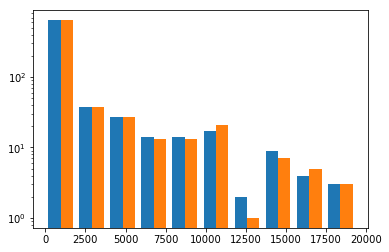

In [19]:
plt.hist([predicted, y_test], log=True);

In [20]:
model.score(X_test,y_test)

0.99510149741320242

# Predecir fecha Actual

In [21]:
data_to_predict.loc[data_to_predict.index[-1]+1] = ['2018-04-05', 6785.90, 6938.8, 6564.9, 6760]

In [22]:
data_to_predict = StockDataFrame.retype(data_to_predict)
data_to_predict.get('open_3_sma')
data_to_predict.get('open_7_sma')
data_to_predict.get('open_30_sma')
data_to_predict['wr_7']
data_to_predict['rsi_14']
data_to_predict.tail(1)

,open,high,low,close,open_3_sma,open_7_sma,open_30_sma,wr_7,close_-1_s,close_-1_d,rs_14,rsi_14
date,,,,,,,,,,,,
2018-04-05,6785.9,6938.8,6564.9,6760.0,6680.853333,6649.9,7448.732333,47.820273,6597.37,162.63,0.616418,38.134825


In [23]:
p = data_to_predict.tail(1)
model.predict(p[['open', 'open_3_sma', 'open_7_sma', 'open_30_sma', 'wr_7', 'rsi_14']])

array([ 6766.7389295])

In [24]:
from cryptowatch.api_client import Client
client = Client()


In [38]:
data = {
    'exchange': 'bitfinex',
    'pair': 'btcusd',
    'route': 'ohlc',
    'params': {
        'periods': '86400,43200',
        #'before': 1480032000,
        'after': 1356868800,
    }
}

dataset = client.get_markets(data=data)

In [39]:
dataset

{'allowance': {'cost': 10817324, 'remaining': 7650777586},
 'result': {'43200': [[1410220800, 464.88, 479.98, 464.53, 471.1, 8408.946, 0],
   [1410264000, 471.16, 472, 463.22, 468.91, 3464.6377, 0],
   [1410307200, 468.91, 479.7, 463, 473.06, 5912.195, 0],
   [1410350400, 473.09, 484, 472, 482, 3810.0496, 0],
   [1410393600, 482.27, 489.99, 476.41, 478.12, 5070.818, 0],
   [1410436800, 478.1, 480.6, 473.2, 474.89, 3043.8025, 0],
   [1410480000, 475, 478.9, 472.2, 477.38, 2069.481, 0],
   [1410523200, 477.04, 477.98, 467, 473.02, 2227.3782, 0],
   [1410566400, 473.37, 474.37, 470.4, 474.37, 1231.2107, 0],
   [1410609600, 474.34, 483.93, 472.86, 479.28, 6234.566, 0],
   [1410652800, 479.28, 483.8, 477.8, 478.69, 1746.225, 0],
   [1410696000, 478.69, 480.85, 475.33, 479.51, 1220.163, 0],
   [1410739200, 480.31, 481.56, 475.72, 476.5, 1902.3633, 0],
   [1410782400, 477.12, 480.18, 475.13, 477.61, 2780.3066, 0],
   [1410825600, 477.64, 480.3, 474.77, 474.77, 2783.8906, 0],
   [1410868800, 4

In [44]:
#df_json = pd.read_json(dataset)
df_c = pd.DataFrame(dataset['result']['86400'], columns=['Date','Open', 'High', 'Low', 'Close', 'Volume'])

In [45]:
df_c['Date'] = pd.to_datetime(df_c['Date'],unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Argentina/Buenos_Aires')
#df_c.Date = df_c.Date.dt.tz_localize('UTC').dt.tz_convert('America/Argentina/Buenos_Aires')
df_c

,Date,Close,Open,High,Low,Close,Volume
0,2013-10-18 21:00:00-03:00,143.500,155.250,143.250,152.98000,13026.0350,0.0
1,2013-10-19 21:00:00-03:00,152.700,178.500,151.500,166.50000,20806.8440,0.0
2,2013-10-20 21:00:00-03:00,168.000,168.875,162.310,166.89000,3846.8337,0.0
3,2013-10-21 21:00:00-03:00,166.440,183.000,166.000,180.37000,12557.0400,0.0
4,2013-10-22 21:00:00-03:00,180.500,215.000,180.500,192.50000,18023.2710,0.0
5,2013-10-23 21:00:00-03:00,194.500,212.890,187.000,203.99000,13826.8370,0.0
6,2013-10-24 21:00:00-03:00,203.000,210.995,155.810,193.86000,38544.2200,0.0
7,2013-10-25 21:00:00-03:00,194.000,195.130,167.750,187.50000,20006.5430,0.0
8,2013-10-26 21:00:00-03:00,186.620,190.000,175.210,179.40646,6265.2660,0.0
9,2013-10-27 21:00:00-03:00,179.560,198.750,179.100,197.90000,6579.2197,0.0


In [46]:
df_c.to_csv('ohlc-2013-10-18_2018-04-04.csv')

In [50]:
stock2 = StockDataFrame.retype(df_c)
stock2.get('open_3_sma')
stock2.get('open_7_sma')
stock2.get('open_30_sma')
stock2['rsi_14']
stock2.head()

ValueError: Wrong number of items passed 2, placement implies 1

In [56]:
stock2

,close,open,high,low,close,volume,open_3_sma,open_7_sma,open_30_sma
date,,,,,,,,,
2013-10-18 21:00:00-03:00,143.500,155.250,143.250,152.98000,13026.0350,0.0,155.250000,155.250000,155.250000
2013-10-19 21:00:00-03:00,152.700,178.500,151.500,166.50000,20806.8440,0.0,166.875000,166.875000,166.875000
2013-10-20 21:00:00-03:00,168.000,168.875,162.310,166.89000,3846.8337,0.0,167.541667,167.541667,167.541667
2013-10-21 21:00:00-03:00,166.440,183.000,166.000,180.37000,12557.0400,0.0,176.791667,171.406250,171.406250
2013-10-22 21:00:00-03:00,180.500,215.000,180.500,192.50000,18023.2710,0.0,188.958333,180.125000,180.125000
2013-10-23 21:00:00-03:00,194.500,212.890,187.000,203.99000,13826.8370,0.0,203.630000,185.585833,185.585833
2013-10-24 21:00:00-03:00,203.000,210.995,155.810,193.86000,38544.2200,0.0,212.961667,189.215714,189.215714
2013-10-25 21:00:00-03:00,194.000,195.130,167.750,187.50000,20006.5430,0.0,206.338333,194.912857,189.955000
2013-10-26 21:00:00-03:00,186.620,190.000,175.210,179.40646,6265.2660,0.0,198.708333,196.555714,189.960000
